# Mounting Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Modules

In [4]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import joblib
from tensorflow.keras.models import load_model
import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np
import os
from joblib import load, dump




# Save Dataset onto file


# Neural Network Code

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the main folder containing red and green tomatoes images
main_folder = '/content/drive/MyDrive/Tomatoes'

# Define image size and batch size
img_size = (224, 224)
batch_size = 32




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Create ImageDataGenerators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load and preprocess images with a validation split
train_generator = datagen.flow_from_directory(
    main_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    main_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)



Found 156 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


In [8]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [9]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Evaluate the model
prov = model.evaluate(validation_generator)



Epoch 1/10
5/5 [==============================] - 32s 5s/step - loss: 2.1835 - accuracy: 0.5000 - val_loss: 0.6414 - val_accuracy: 0.5263
Epoch 2/10
5/5 [==============================] - 18s 4s/step - loss: 0.5655 - accuracy: 0.6859 - val_loss: 0.4214 - val_accuracy: 0.9737
Epoch 3/10
5/5 [==============================] - 18s 4s/step - loss: 0.2812 - accuracy: 0.9808 - val_loss: 0.1054 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 19s 4s/step - loss: 0.2123 - accuracy: 0.9295 - val_loss: 0.0269 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 24s 5s/step - loss: 0.1403 - accuracy: 0.9744 - val_loss: 0.0537 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 25s 4s/step - loss: 0.1016 - accuracy: 0.9615 - val_loss: 0.0266 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 28s 5s/step - loss: 0.0372 - accuracy: 0.9872 - val_loss: 0.0219 - val_accuracy: 1.0000
Epoch 8/10
5/5 [==================

In [12]:
model.save('/content/drive/MyDrive/Batman vs Unripe')

# Accuracy Parameters

In [ ]:
loss, accuracy = model.evaluate(validation_generator, steps=len(validation_generator))
print(f'Validation accuracy: {accuracy:.2f}')


2/2 [==============================] - 3s 313ms/step - loss: 0.0271 - accuracy: 0.9737
Validation accuracy: 0.97


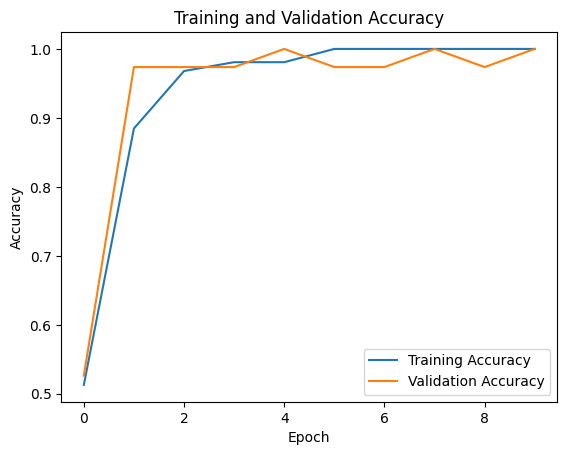

In [ ]:
import matplotlib.pyplot as plt


# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


# Saving the model

In [28]:
from google.colab import drive
drive.mount('/content/drive')

model_path = '/content/drive/MyDrive/Tomato.h5'
model.save(model_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Deployment

In [ ]:
!pip install streamlit

OSError: Unable to open file (file signature not found)

In [36]:
import streamlit as st
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np

# Load the model
model_path = '/content/drive/MyDrive/Tomato.h5'
model = load_model(model_path)

# Function to preprocess the image
def preprocess_image(image):
    img = image.resize((224, 224))  # Resize the image to (224, 224)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create a batch of size 1
    return img_array

# Streamlit app
st.title('Tomato Ripeness Classifier')
uploaded_file = st.file_uploader("Upload an image of a tomato", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    # Display the uploaded image
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)

    # Preprocess the image
    img_array = preprocess_image(image)

    # Make a prediction
    prediction = model.predict(img_array)
    ripeness = np.argmax(prediction)

    # Display the prediction
    if ripeness == 0:
        st.write('Prediction: Unripe Tomato')
    elif ripeness == 1:
        st.write('Prediction: Ripe Tomato')
    else:
        st.write('Prediction: Overripe Tomato')


In [22]:
!pip install ngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 21.9 MB/s eta 0:00:00


In [16]:
!pip install pyngrok

In [23]:
!ngrok authtoken 2cr8LduaMkxFVbSf9gr7qN14il2_2DafKvS6zcrnV2dRhnvD6
!nohup streamlit run app.py &

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
nohup: appending output to 'nohup.out'


In [37]:
def get_ngrok_tunnel():
    tunnels = ngrok.get_tunnels()
    if len(tunnels) < 3:
        return ngrok.connect(8501)
    else:
        return tunnels[0]  # Reuse the first tunnel

ngrok_tunnel = get_ngrok_tunnel()
print("Public URL:", ngrok_tunnel.public_url)

Public URL: https://8230-34-106-218-202.ngrok-free.app
